# Template for SVM Classifier Comparison

In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

from sklearn.model_selection import cross_validate, KFold

In [3]:
np.random.seed(0)

## Assessment of the SVC

In [4]:
def classifier_assessment(X, y):
    """
    SVC comparison for the different datasets

    args: X dataset of features
          y target set of values for classification

    returns: 
        - a dummy classifier score using "most frequent" value assignment
        - the mean of the SVC prediction scores taken from a 
          5 fold cross validation on the dataset
    """
    
    clf_svc = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
        
    def performance_graphics(X=X, y=y, clf=clf_svc):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
        clf.fit(X_train, y_train)
     
        proba_ = clf.predict_proba(X_test)[:, 1]

        precision, recall, thresholds = precision_recall_curve(y_test, proba_)
        fp, tp, thresholds_roc = roc_curve(y_test, proba_)
        
        auc_score = np.round(roc_auc_score(y_test, proba_), 4)

        close_default = np.argmin(np.abs(thresholds - 0.5))
        close_zero = np.argmin(np.abs(thresholds_roc))

        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 4))

        ax1.plot(precision, recall, label="Precision Recall Curve")
        ax1.plot(precision[close_default], 
                 recall[close_default], 'o', 
                 c='r', markersize=10, 
                 label='threshold 0.5', 
                 fillstyle="none", mew=2)
        ax1.set_title("RF performance")
        ax1.set_xlabel("Precision")
        ax1.set_ylabel("Recall")
        ax1.legend(loc='best')

        ax2.plot(fp, tp, label="ROC curve")
        ax2.plot(fp[close_zero], 
                 tp[close_zero], 'o', 
                 c='r', markersize=10, 
                 label='threshold 0', 
                 fillstyle="none", mew=2)
        ax2.set_title(f"ROC performance: AUC Score {auc_score}")
        ax2.set_xlabel("False Positive Rate")
        ax2.set_ylabel("True Positive (Recall)")
        ax2.legend(loc='best')

        plt.show();

    kfold = KFold(n_splits=5)
    cross_val = cross_validate(clf_svc, X, y, cv=kfold, return_estimator=True)
    mean_score = cross_val['test_score'].mean()
        
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X,y)
    d_score = dummy_clf.score(X,y)
    
    graphic = performance_graphics

    return d_score, mean_score, graphic

# Compare Simpson Dataset

Dataset preconfigured

In [5]:
y = pd.read_csv('./data/target_lisa.csv')
y = y['target']

In [6]:
df = pd.read_csv('./data/episode_summary_lisa.csv')

In [7]:
dummy, mean_score, graphic = classifier_assessment(df, y)

In [8]:
print(f"The mean from a 5 fold comparison: {mean_score}")
print(f"Compared to the dummy score: {dummy}")   

The mean from a 5 fold comparison: 0.9258652613587808
Compared to the dummy score: 0.596964586846543


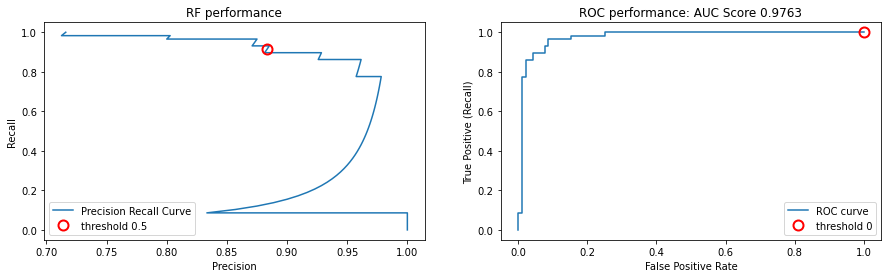

In [9]:
graphic()